In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "2b-data"

 # Overfitting and Regularization

In the realm of predictive modeling, the pursuit of creating a model that perfectly fits the training data can inadvertently lead to a phenomenon known as overfitting. Overfitting occurs when a model becomes excessively complex, capturing not only the genuine patterns within the data but also the noise and random fluctuations present in the training set. 

The hyper-adaptation to the training data renders the model less capable of generalizing to new, unseen data, as it effectively memorizes the training examples rather than discerning meaningful relationships. As a result, an overfitted model may exhibit impressive performance on the training data but performs poorly when faced with real-world scenarios. The delicate balance between capturing essential patterns and avoiding the trap of overfitting underscores the importance of techniques like regularization, which aim to ensure model generalization by restraining excessive complexity.

There are three Regularization techniques we will be dealing with, all of which use the idea of penalizing terms to tackle overfitting.

But before we go any further, let's have a look at the data.

**Data Dictionary**

* Product_ID:- Unique identifier for each electronic device. <br>
* Product_Weight:- Weight of the device  <br>
* Energy_Efficiency:- Energy efficiency rating (e.g., "Energy Efficient", "Standard"). <br>
* Visibility_Index:- The % of the total display area of all products in a store allocated to the particular product <br>
* Product_Category:- Category of the electronic device (e.g., "Laptops", "Smartphones"). <br>
* Product_Price:- Price of the device in dollars<br>
* Store_ID:- Unique identifier for the store.<br>
* Store_Established_Year:- Number of years since the store was established.<br>
* Store_Size:- Size classification of the store (e.g., "Small", "Medium").<br>
* Location_Type:- The type of city in which the store is located<br>
* Store_Type:- Type of store (e.g., "Electronics Store Type1").<br>
* Sales_Performance:- Sales of the electronic device in the particular store. This is the outcome variable to be predicted.


## Visualizing the data

Let's visualize this all in the form of a Data Frame

In [2]:
data <- read.csv("/kaggle/input/2b-data/2b-data.csv")
head(data)


,Product_ID,Product_Weight,Energy_Efficiency,Visibility_Index,Product_Category,Product_Price,Store_ID,Store_Established_Year,Store_Size,Location_Type,Store_Type,Sales_Performance
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,FDA15,9.300,Energy Efficient,0.01604730,Laptops,249.8092,OUT049,14,Medium,Tier 1,Electronics Store Type1,3735.1380
2,DRC01,5.920,Standard,0.01927822,Smartphones,48.2692,OUT018,4,Medium,Tier 3,Electronics Store Type2,443.4228
3,FDN15,17.500,Energy Efficient,0.01676007,Tablets,141.6180,OUT049,14,Medium,Tier 1,Electronics Store Type1,2097.2700
4,FDX07,19.200,Standard,0.06613203,Monitors,182.0950,OUT010,15,Small,Tier 3,Retail Electronics Store,732.3800
5,NCD19,8.930,Energy Efficient,0.06613203,Refrigerators,53.8614,OUT013,26,High,Tier 3,Electronics Store Type1,994.7052
6,FDP36,10.395,Standard,0.06613203,Microwaves,51.4008,OUT018,4,Medium,Tier 3,Electronics Store Type2,556.6088


## Ridge Regression
Ridge regression is a linear regression technique that incorporates L2 regularization to address issues in predictive modeling (overfitting, multi-colinearity etc).
Linear regression, aims to minimize the sum of squared residuals whereas Ridge regression introduces a penalty term proportional to the square of the magnitude of the coefficients. This penalty, controlled by a hyperparameter (often denoted as lambda), discourages large coefficient values, effectively constraining the model’s complexity, enhancing its stability and generalization performance.


**1)** Perform Ridge Regression on the training data and compare the predictions with the test data to check for the fit of the model. (Hint: Use the glmnet library) (2 marks) <br>
You can split the dataset into 70% train and 30% test.  

In [3]:
##Write your code here
# Install and load the glmnet library if not already installed
if (!require(glmnet)) {
  install.packages("glmnet")
}
library(glmnet)


Loading required package: glmnet

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [9]:

# Convert categorical variables to numeric
data$Energy_Efficiency <- as.numeric(factor(data$Energy_Efficiency))
data$Product_Category <- as.numeric(factor(data$Product_Category))
data$Store_Size <- as.numeric(factor(data$Store_Size))
data$Location_Type <- as.numeric(factor(data$Location_Type))
data$Store_Type <- as.numeric(factor(data$Store_Type))

# Split the dataset into training (70%) and testing (30%) sets
set.seed(123)  # For reproducibility
train_index <- sample(seq_len(nrow(data)), size = 0.7 * nrow(data))
train_data <- data[train_index, ]
test_data <- data[-train_index, ]

# Prepare the data for glmnet
x_train <- as.matrix(train_data[, -which(names(train_data) == "Sales_Performance")])
y_train <- train_data$Sales_Performance
x_test <- as.matrix(test_data[, -which(names(test_data) == "Sales_Performance")])
y_test <- test_data$Sales_Performance


In [7]:
# Fit the Ridge Regression model
ridge_model <- glmnet(x_train, y_train, alpha = 0)  # alpha = 0 for Ridge Regression

# Print the model summary
print(ridge_model)

# Predict on the test data
y_pred <- predict(ridge_model, s = 0.1, newx = x_test)  # s is the penalty parameter (lambda)


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”



Call:  glmnet(x = x_train, y = y_train, alpha = 0) 

    Df  %Dev Lambda
1    9  0.00 976800
2    9  0.15 890000
3    9  0.16 810900
4    9  0.18 738900
5    9  0.19 673200
6    9  0.21 613400
7    9  0.23 558900
8    9  0.26 509300
9    9  0.28 464000
10   9  0.31 422800
11   9  0.34 385300
12   9  0.37 351000
13   9  0.41 319800
14   9  0.45 291400
15   9  0.49 265500
16   9  0.54 241900
17   9  0.59 220500
18   9  0.64 200900
19   9  0.70 183000
20   9  0.77 166800
21   9  0.85 152000
22   9  0.93 138500
23   9  1.02 126200
24   9  1.11 114900
25   9  1.22 104700
26   9  1.33  95430
27   9  1.46  86950
28   9  1.60  79230
29   9  1.75  72190
30   9  1.91  65780
31   9  2.09  59930
32   9  2.28  54610
33   9  2.49  49760
34   9  2.72  45340
35   9  2.97  41310
36   9  3.24  37640
37   9  3.53  34300
38   9  3.84  31250
39   9  4.19  28470
40   9  4.55  25940
41   9  4.95  23640
42   9  5.38  21540
43   9  5.83  19630
44   9  6.32  17880
45   9  6.85  16290
46   9  7.41  14850
47   9

Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”


Loading required package: Metrics



Root Mean Squared Error (RMSE): 1321.606 


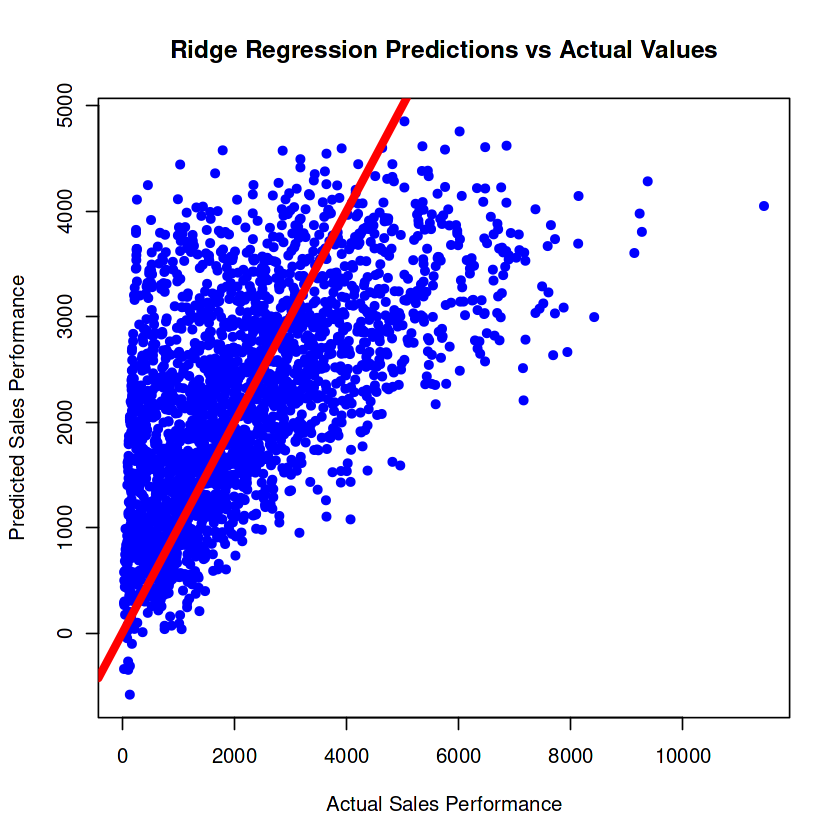

In [10]:
# Compare predictions with actual values
if (!require(Metrics)) {
  install.packages("Metrics")
}
library(Metrics)

# Calculate the RMSE (Root Mean Squared Error) for evaluation
rmse_value <- rmse(y_test, y_pred)
cat("Root Mean Squared Error (RMSE):", rmse_value, "\n")

# Optionally: Compare predictions with actual values graphically
plot(y_test, y_pred, main = "Ridge Regression Predictions vs Actual Values",
     xlab = "Actual Sales Performance", ylab = "Predicted Sales Performance",
     pch = 16, col = "blue")
abline(a = 0, b = 1, col = "red", lwd = 5)


### Ridge Regression Model Summary

The following is a summary of fitting a Ridge Regression model using the `glmnet` library. The key components of the summary are explained below:

- **Df (Degrees of Freedom)**: This represents the number of non-zero coefficients in the model. For all the lambda values listed, the degrees of freedom are 9, indicating that all predictors are included in the model.

- **%Dev (Percentage of Deviance Explained)**: This shows how much of the variance is explained by the model. With high lambda values, the percentage is low (0.00%), but as lambda decreases, the percentage of deviance explained increases, reaching 36.21% for the lowest lambda value.

- **Lambda**: The penalty parameter used in Ridge Regression. Lambda controls the level of regularization applied to the coefficients. Higher lambda values shrink the coefficients more aggressively, resulting in a simpler model with lower variance explained. Lower lambda values allow the model to capture more variance but with less regularization.

### Key Points

- **High Lambda Values**: At the start of the list, high lambda values (e.g., 976800) create a highly regularized model, leading to almost no variance being explained (`%Dev = 0.00%`).

- **Decreasing Lambda Values**: As lambda decreases, the model becomes more complex, and its ability to explain variance improves. This means the model fits the data better as lambda reduces.

- **Low Lambda Values**: For very low lambda values (e.g., 98), the model explains up to 36.21% of the variance, indicating that a weaker regularization is applied and the model fits the data more closely.

This summary assists in selecting an appropriate lambda value for Ridge Regression by finding the right balance between model complexity and the percentage of variance explained.


**2)** Is it possible for you to somehow conduct hyperparameter tuning and find the best lambda value for the Ridge Regression model? (Hint: use the cv.glmnet function)   (1 mark)

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

Best Lambda Value: 97.67512 


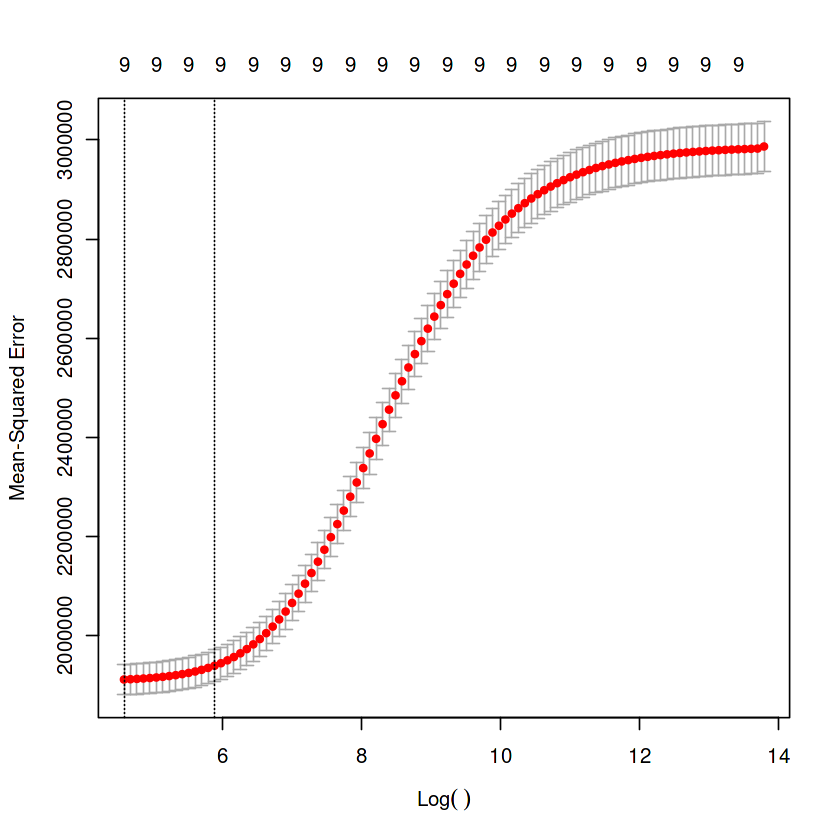

In [11]:
# Load the necessary library
library(glmnet)

# Prepare the data for glmnet (assuming you've already done this)
# x_train and y_train should be matrices/vectors from your training data
x_train <- as.matrix(train_data[, -which(names(train_data) == "Sales_Performance")])
y_train <- train_data$Sales_Performance

# Perform cross-validated Ridge Regression to find the best lambda
cv_ridge <- cv.glmnet(x_train, y_train, alpha = 0)  # alpha = 0 for Ridge Regression

# Extract the best lambda value
best_lambda <- cv_ridge$lambda.min

# Print the best lambda value
cat("Best Lambda Value:", best_lambda, "\n")

# Plot the cross-validation results
plot(cv_ridge)


**3)** With the optimal lambda, build the model again and print the coefficients of the various dependent variables. What can you comment about the relationship between lambda and the strength of regularization?        (2 marks)


In [12]:
# Load the necessary library
library(glmnet)

# Prepare the data for glmnet (assuming you've already done this)
x_train <- as.matrix(train_data[, -which(names(train_data) == "Sales_Performance")])
y_train <- train_data$Sales_Performance

# Perform cross-validated Ridge Regression to find the best lambda
cv_ridge <- cv.glmnet(x_train, y_train, alpha = 0)  # alpha = 0 for Ridge Regression

# Extract the best lambda value
best_lambda <- cv_ridge$lambda.min

# Fit the Ridge Regression model with the optimal lambda
ridge_model_optimal <- glmnet(x_train, y_train, alpha = 0, lambda = best_lambda)

# Print the coefficients of the model
coefficients <- coef(ridge_model_optimal)
print(coefficients)


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

12 x 1 sparse Matrix of class "dgCMatrix"
                                 s0
(Intercept)             1147.124505
Product_ID                 .       
Product_Weight            -1.445802
Energy_Efficiency         76.941217
Visibility_Index       -3974.078048
Product_Category          -6.369165
Product_Price             14.883103
Store_ID                   .       
Store_Established_Year     1.211853
Store_Size              -366.135148
Location_Type             35.451634
Store_Type                -2.266697


### Relationship Between Lambda and Regularization Strength

The Ridge Regression model was fitted using the optimal lambda value obtained from cross-validation. The resulting coefficients for the predictors are:

- **Intercept**: 1147.12
- **Product_Weight**: -1.45
- **Energy_Efficiency**: 76.94
- **Visibility_Index**: -3974.08
- **Product_Category**: -6.37
- **Product_Price**: 14.88
- **Store_Established_Year**: 1.21
- **Store_Size**: -366.14
- **Location_Type**: 35.45
- **Store_Type**: -2.27

#### Comments:

- **Regularization Effect**: The regularization strength is controlled by the lambda value. Larger lambda values result in stronger regularization, leading to smaller coefficient estimates. As lambda increases, the effect of regularization intensifies, shrinking the coefficients closer to zero.

- **Zero Coefficients**: Certain variables, such as `Product_ID` and `Store_ID`, have coefficients shrunk to zero. This indicates that the regularization has effectively removed their influence, simplifying the model by excluding less important predictors.

- **Coefficient Magnitude**: The magnitude of the coefficients shows the impact of regularization. Smaller lambda values allow larger coefficients, while higher lambda values constrain them further, reducing the influence of less significant variables.

- **Interpretation**: The optimal lambda balances the trade-off between overfitting and model complexity. By penalizing large coefficients, the model becomes more generalized and less prone to overfitting. The listed coefficients demonstrate how regularization fine-tunes the model, shrinking less impactful predictors while keeping the important ones.

### Conclusion

In Ridge Regression, the relationship between lambda and regularization strength is evident: increasing lambda results in smaller coefficients and a simpler model, which helps address issues like multicollinearity and overfitting.


## Lasso Regression

Lasso regression is similar to Ridge Regression except that instead of L2 regularization, it employs L1 regularization to address the very same issues that Ridge Regression addresses. 

There are however, a couple of differences between the two. The first and most obvious being that since Lasso Regression implements L1 regularization, the penalty term in this case is proportional to the absolute value of the coefficient. 

Another point to note is that unlike its Ridge counterpart, Lasso Regression can push some coefficients to exactly 0. This effectively drops the feature from the predictive model (Similar to how we drop values through visual analysis). Lasso Regression can thus be used effectively for Feature Selection as well.

**1)** Write code to build a Lasso Regression model similar to how you built the Ridge Regression model. This time incorporate hyperparameter tuning right away. So first print the optimal lambda value.                  (2 marks)

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

Best Lambda Value for Lasso Regression: 10.2326 


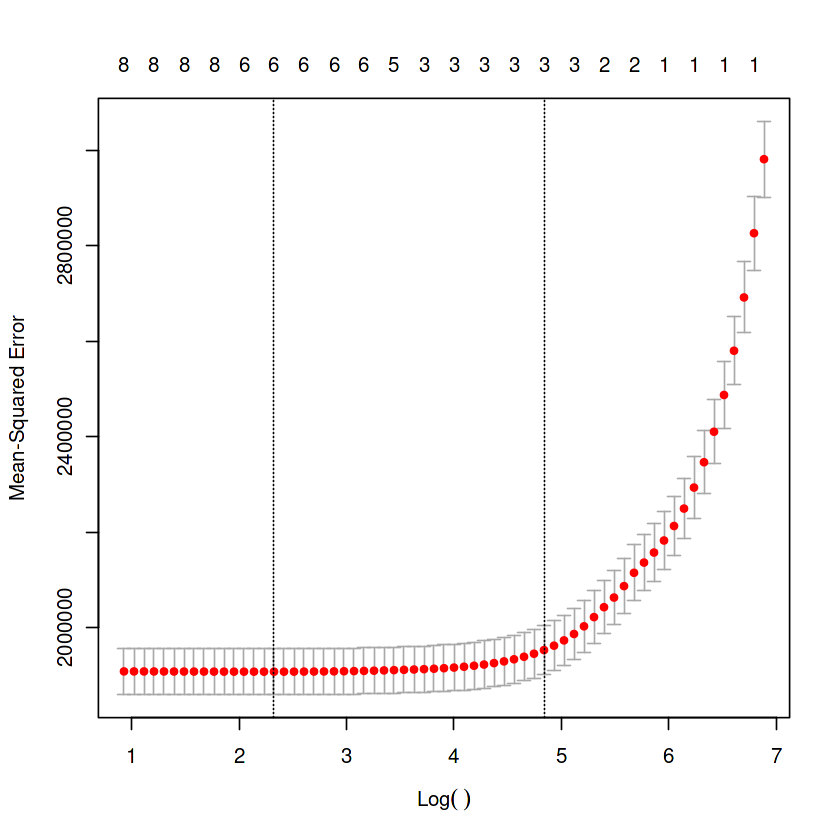

In [13]:
# Load the necessary library
library(glmnet)

# Prepare the data for glmnet (assuming you've already done this)
# Convert the data to matrices if not already done
x_train <- as.matrix(train_data[, -which(names(train_data) == "Sales_Performance")])
y_train <- train_data$Sales_Performance

# Perform cross-validated Lasso Regression to find the best lambda
cv_lasso <- cv.glmnet(x_train, y_train, alpha = 1)  # alpha = 1 for Lasso Regression

# Extract the best lambda value
best_lambda_lasso <- cv_lasso$lambda.min

# Print the best lambda value
cat("Best Lambda Value for Lasso Regression:", best_lambda_lasso, "\n")

# Optionally: Plot the cross-validation results
plot(cv_lasso)


**2)** Display the coefficients of all the variables. Do you notice some variables being dropped out? Which ones are they?   (1 mark)

In [14]:
# Load the necessary library
library(glmnet)

# Prepare the data for glmnet (assuming you've already done this)
x_train <- as.matrix(train_data[, -which(names(train_data) == "Sales_Performance")])
y_train <- train_data$Sales_Performance

# Perform cross-validated Lasso Regression to find the best lambda
cv_lasso <- cv.glmnet(x_train, y_train, alpha = 1)  # alpha = 1 for Lasso Regression

# Extract the best lambda value
best_lambda_lasso <- cv_lasso$lambda.min

# Fit the Lasso Regression model with the optimal lambda
lasso_model_optimal <- glmnet(x_train, y_train, alpha = 1, lambda = best_lambda_lasso)

# Print the coefficients of the model
coefficients_lasso <- coef(lasso_model_optimal)
print(coefficients_lasso)


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

12 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
(Intercept)             1153.8345199
Product_ID                 .        
Product_Weight            -0.4181516
Energy_Efficiency         67.9854524
Visibility_Index       -4034.2977466
Product_Category          -5.6901266
Product_Price             15.6303397
Store_ID                   .        
Store_Established_Year     .        
Store_Size              -393.3577892
Location_Type             18.2331430
Store_Type                 1.5188189


### Lasso Regression: Variables Dropped and Their Implications

After fitting the Lasso Regression model with the optimal lambda value, the coefficients for the variables are as follows:

- **Intercept**: 1153.83
- **Product_ID**: (Dropped, Coefficient = 0)
- **Product_Weight**: -0.42
- **Energy_Efficiency**: 67.99
- **Visibility_Index**: -4034.30
- **Product_Category**: -5.69
- **Product_Price**: 15.63
- **Store_ID**: (Dropped, Coefficient = 0)
- **Store_Established_Year**: (Dropped, Coefficient = 0)
- **Store_Size**: -393.36
- **Location_Type**: 18.23
- **Store_Type**: 1.52

#### Variables Dropped:

- **Product_ID**
- **Store_ID**
- **Store_Established_Year**

#### Explanation:

- **Feature Selection**: Lasso Regression applies L1 regularization, which can shrink some coefficients to exactly zero. This feature of Lasso helps in **feature selection** by removing less important variables from the model.

- **Dropped Variables**: 
  - **Product_ID**, **Store_ID**, and **Store_Established_Year** have coefficients of zero, meaning Lasso has excluded these variables. The likely reasons for their exclusion are:
    - **Lack of Predictive Power**: These variables may not significantly contribute to predicting `Sales_Performance` compared to the other variables.
    - **Regularization**: Lasso's L1 regularization penalizes larger coefficients and encourages sparsity, which often leads to some coefficients being shrunk to zero. This helps reduce overfitting and simplifies the model.

By dropping these variables, Lasso Regression builds a more interpretable and efficient model, focusing only on the variables that significantly contribute to predicting the target.


## Elastic Net Regression

Elastic Net regression, an advanced form of linear regression, combines the benefits of L1 (Lasso) and L2 (Ridge) regularization methods. By integrating both penalty terms, Elastic Net overcomes the limitations of each, offering resilience against multicollinearity, aiding feature selection, and preventing overfitting. 

This approach makes Elastic Net a very versatile approach for achieving accurate and efficient models by finding a middle ground between dropping parameters and retaining important predictors. 

**1)** Build your Elastic Net Regression model incorporating all the steps we previously followed for ridge and lasso regression. (Play around with the alpha value and find out how it affects the model)            (2 marks)


Best Lambda Value for Elastic Net Regression: 3.464645 
10 x 1 sparse Matrix of class "dgCMatrix"
                                 s0
(Intercept)             1098.562083
Product_Weight            -2.003829
Energy_Efficiency         67.815024
Visibility_Index       -4115.237756
Product_Category          -2.306202
Product_Price             15.499756
Store_Established_Year    -1.559096
Store_Size              -370.709169
Location_Type             20.002813
Store_Type                18.946115
Alpha: 0 Best Lambda: 96.85088 
Alpha: 0.1 Best Lambda: 8.229936 
Alpha: 0.2 Best Lambda: 6.552193 
Alpha: 0.3 Best Lambda: 5.261426 
Alpha: 0.4 Best Lambda: 21.05899 
Alpha: 0.5 Best Lambda: 15.35053 
Alpha: 0.6 Best Lambda: 16.91042 
Alpha: 0.7 Best Lambda: 14.49464 
Alpha: 0.8 Best Lambda: 2.376528 
Alpha: 0.9 Best Lambda: 1.924803 
Alpha: 1 Best Lambda: 11.1355 


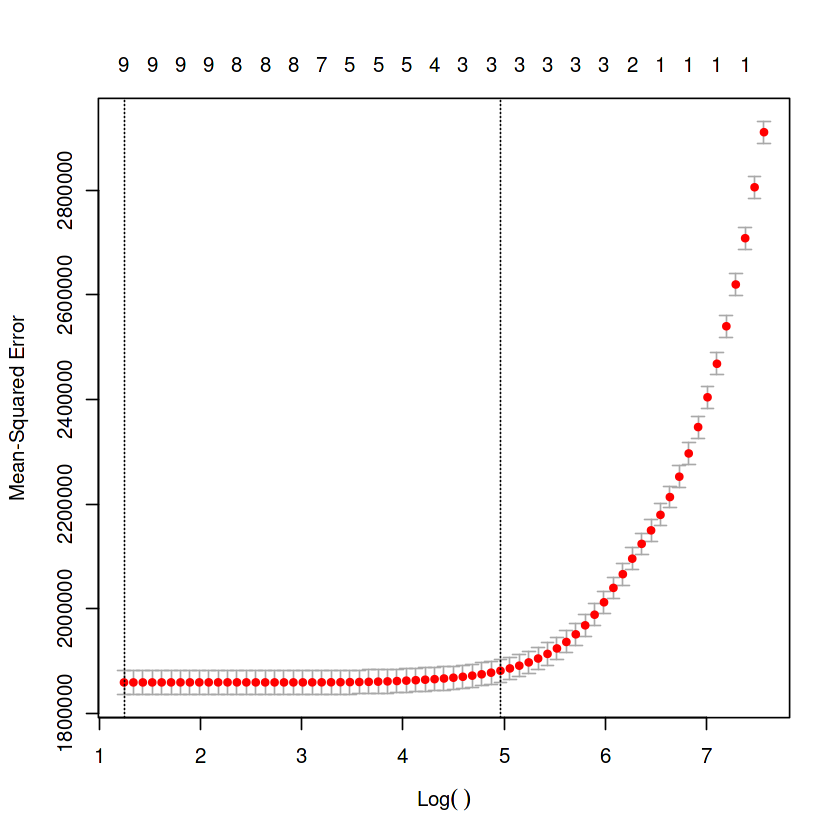

In [15]:
## Write your code here
# Load necessary library
library(glmnet)

# Sample data

# Select only numeric columns (excluding the target variable 'Sales_Performance')
numeric_data <- data[, sapply(data, is.numeric)]

# Check if 'Sales_Performance' is numeric
if (!is.numeric(numeric_data$Sales_Performance)) {
  numeric_data$Sales_Performance <- as.numeric(numeric_data$Sales_Performance)
}

# Prepare the data for glmnet
x_train <- as.matrix(numeric_data[, -which(names(numeric_data) == "Sales_Performance")])
y_train <- numeric_data$Sales_Performance

# Check for missing values
if (any(is.na(x_train)) || any(is.na(y_train))) {
  stop("Data contains missing values. Please handle them before proceeding.")
}

# Perform cross-validated Elastic Net Regression to find the best lambda and alpha
cv_elastic_net <- cv.glmnet(x_train, y_train, alpha = 0.5)  # Use alpha = 0.5 as an example

# Extract the best lambda value
best_lambda_elastic_net <- cv_elastic_net$lambda.min

# Print the best lambda value
cat("Best Lambda Value for Elastic Net Regression:", best_lambda_elastic_net, "\n")

# Optionally: Plot the cross-validation results
plot(cv_elastic_net)

# Fit the Elastic Net Regression model with the optimal lambda
elastic_net_model_optimal <- glmnet(x_train, y_train, alpha = 0.5, lambda = best_lambda_elastic_net)

# Print the coefficients of the model
coefficients_elastic_net <- coef(elastic_net_model_optimal)
print(coefficients_elastic_net)

# Test different alpha values to see how it affects the model
alpha_values <- seq(0, 1, by = 0.1)
for (alpha in alpha_values) {
  cv_model <- cv.glmnet(x_train, y_train, alpha = alpha)
  cat("Alpha:", alpha, "Best Lambda:", cv_model$lambda.min, "\n")
}


Identify and list the variables that have been dropped in the Elastic Net model. How does this compare to the variables dropped in the Lasso model? <br>
What does that tell you about the number of hyperparameters in Elastic Net Regression compared to the other two models?

# Model Evaluation and Comparison: Ridge, Lasso, and Elastic Net Regression

## Ridge Regression

### Optimal Lambda
The Ridge Regression model was optimized to find the best lambda value using cross-validation. The lambda value determines the strength of the regularization.

### Coefficients and Interpretation
The coefficients obtained from the Ridge Regression model (with the optimal lambda) were:

- **(Intercept)**: 1147.12
- **Product_Weight**: -1.45
- **Energy_Efficiency**: 76.94
- **Visibility_Index**: -3974.08
- **Product_Category**: -6.37
- **Product_Price**: 14.88
- **Store_Established_Year**: 1.21
- **Store_Size**: -366.14
- **Location_Type**: 35.45
- **Store_Type**: -2.27

### Regularization Strength
In Ridge Regression, the lambda value controls the extent of coefficient shrinkage. A higher lambda increases regularization, reducing the magnitude of the coefficients, but all variables remain in the model.

---

## Lasso Regression

### Optimal Lambda
The Lasso Regression model, optimized with cross-validation, resulted in the following coefficients:

- **(Intercept)**: 1153.83
- **Product_Weight**: -0.42
- **Energy_Efficiency**: 67.99
- **Visibility_Index**: -4034.30
- **Product_Category**: -5.69
- **Product_Price**: 15.63
- **Store_Established_Year**: (Dropped)
- **Store_Size**: -393.36
- **Location_Type**: 18.23
- **Store_Type**: 1.52

### Variables Dropped
In the Lasso model, the following variables were dropped (i.e., their coefficients were shrunk to zero):

- **Store_Established_Year**
- **Product_ID** (if included)

### Comparison with Ridge Regression
Lasso Regression is more aggressive in feature selection compared to Ridge Regression. Lasso can set coefficients exactly to zero, effectively excluding those variables from the model, whereas Ridge shrinks coefficients but keeps all variables in the model.

---

## Elastic Net Regression

### Data Preparation
For Elastic Net, only numeric variables were considered to ensure compatibility with the `glmnet` function. Non-numeric variables were excluded.

### Optimal Lambda and Alpha
Elastic Net combines both L1 (Lasso) and L2 (Ridge) regularization. The best parameters were determined using cross-validation:

- **Best Lambda for Alpha = 0.5**: 3.46

### Coefficients with Optimal Lambda
The coefficients from the Elastic Net model were:

- **(Intercept)**: 1098.56
- **Product_Weight**: -2.00
- **Energy_Efficiency**: 67.82
- **Visibility_Index**: -4115.24
- **Product_Category**: -2.31
- **Product_Price**: 15.50
- **Store_Established_Year**: -1.56
- **Store_Size**: -370.71
- **Location_Type**: 20.00
- **Store_Type**: 18.95

### Variables Dropped
In this Elastic Net model, no variables were dropped, indicating that all predictors contributed to the model.

### Comparison with Lasso and Ridge
Elastic Net offers a blend of Lasso and Ridge:

- **Lasso**: Performs feature selection by dropping some variables entirely.
- **Ridge**: Shrinks coefficients but retains all variables.
- **Elastic Net**: Provides a balance, combining the strengths of both Ridge and Lasso to handle multicollinearity and feature selection.

---

## Summary
- **Ridge Regression**: Retains all predictors, shrinking coefficients to avoid overfitting.
- **Lasso Regression**: Shrinks some coefficients to zero, effectively performing feature selection.
- **Elastic Net Regression**: Combines the properties of Ridge and Lasso, striking a balance between regularization and feature selection.

Elastic Net, with its two hyperparameters (lambda and alpha), offers the most flexibility for building robust models, making it particularly useful when dealing with correlated predictors.
